In [1]:
#! pip install tslearn

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn import metrics

In [3]:
# Загрузим данные.

path_to_file = 'traks.csv'
df = pd.read_csv(path_to_file, delimiter = ";")
df.head()

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573


In [4]:
df['track'].value_counts()

1    35
3    33
2    27
4    19
Name: track, dtype: int64

In [5]:
# Данные представляют собой 4 временных ряда разной длины.

In [20]:
# Выделим отдельно каждый временной ряд из четырёх.

df_1 = df[df['track'] == 1]
df_2 = df[df['track'] == 2]
df_3 = df[df['track'] == 3]
df_4 = df[df['track'] == 4]

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

# Временные ряды разной длины. 

(35, 4)
(27, 4)
(33, 4)
(19, 4)


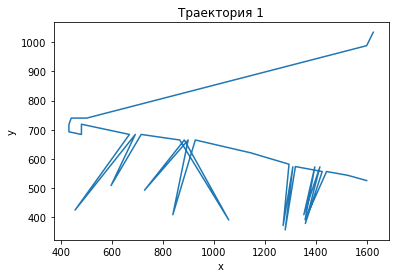

In [7]:
# Посмотрим на каждый из четырёх рядов в отдельности. Будем выводить их на графике.

plt.title("Траектория 1") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(df_1['x'], df_1['y'])

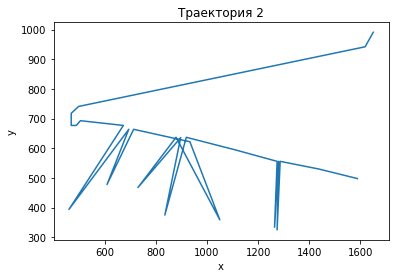

In [8]:
plt.title("Траектория 2") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(df_2['x'], df_2['y'])

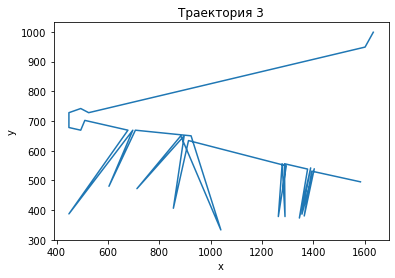

In [9]:
plt.title("Траектория 3") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(df_3['x'], df_3['y'])

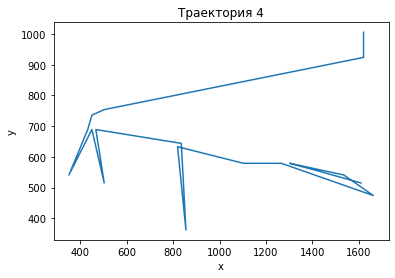

In [10]:
plt.title("Траектория 4") 
plt.xlabel("x")
plt.ylabel("y")
plt.plot(df_4['x'], df_4['y'])

Визуально можно наблюдать, что траектория 1 и 3 очень похожи.
Траектории 1 и 2 тоже похожи, но отличаются сильнее (правый нижний угол), чем 1 и 3.
Траектория 4 отличается от 1,2,3.

In [11]:
# Возьмём из датафрейма координаты.

df2 = df[['x','y']]

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:06<00:00,  1.38it/s]


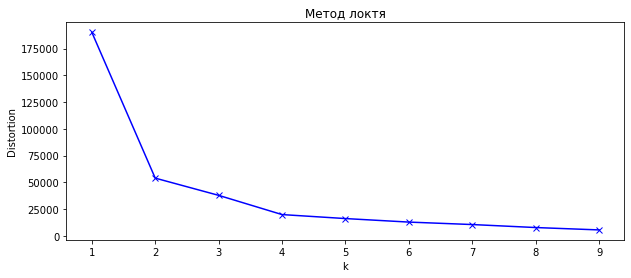

In [12]:
# Попробуем применить кластеризацию для временных рядов с метрикой Dynamic Time Warping.
# Количество кластеров будем варьировать, чтобы потом посмотреть график (метод локтя).
# Интересно, обнаружит ли кластеризация разницу между рядом 4 и рядами 1,2,3.

distortions = []

K = range(1, 10)
for k in tqdm(K):
    kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw")
    kmeanModel.fit(df2)
    distortions.append(kmeanModel.inertia_)
    

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Метод локтя')
plt.show()



Видим на графике метода локтя две точки перепада для 2 и 4 кластеров. Всего у нас 4 временных ряда, поэтому на графике выделяется точка 4. Но из 4 рядов три похожи между собой, а четвёртый отличается сильнее. Поэтому получается как бы 2 кластера. Поэтому выделяется точка 2.

In [13]:
# Выделим из датафреймов с координатами, временем и меткой класса фреймы с координатами.

df2_1 =df_1[['x', 'y']]
df2_2 =df_2[['x', 'y']]
df2_3 =df_3[['x', 'y']]
df2_4 =df_4[['x', 'y']]

In [21]:
"""
Траектория это набор точек. Т.е. сравнение траекторий это сравнение точек.
Можно было бы воспользоваться Евклидовым расстоянием для вычисления меры сходства временных рядов между собой.
Но у Евклида есть недостаток - он работает с рядами одной длинны. Плюс 
плохо показывает себя при сдвиге одного ряда относительно другого даже когда у них похожая форма.
Я пробовал делать паддинг чтобы ряды были одной длинны и потом сравнивал растояние Евклида для x и y. Получилось не очень.
Можно было бы сделать подсчёт расстояние Евклида между матрицами ( с двумя столбцами координат x и y каждая). 
Но в статьях на тему сравнения временных рядов рекомендовали использовать DTW. Его имплементация есть в tslearn.

"""



# Для начала ради интереса сравним траекторию саму с собой 
similarity_measure_1_1 = metrics.dtw(df2_1, df2_1)
print("Сравнение траекторий 1 и 1   ",similarity_measure_1_1)


# Сравним траекторию 1 и 2
similarity_measure_1_2 = metrics.dtw(df2_1, df2_2)
print('Сравнение траекторий 1 и 2   ', similarity_measure_1_2)

# Сравним траекторию 1 и 3
similarity_measure_1_3 = metrics.dtw(df2_1, df2_3)
print("Сравнение траекторий 1 и 3    ", similarity_measure_1_3)

# Сравним траекторию 1 и 4
similarity_measure_1_4 = metrics.dtw(df2_1, df2_4)
print("Сравнение траекторий 1 и 4   ",similarity_measure_1_4)


# Сравним траекторию 2 и 3
similarity_measure_2_3 = metrics.dtw(df2_2, df2_3)
print("Сравнение траекторий 2 и 3   ",similarity_measure_2_3)



# Сравним траекторию 4 и 2
similarity_measure_4_2 = metrics.dtw(df2_4, df2_2)
print("Сравнение траекторий 4 и 2   ",similarity_measure_4_2)


# Сравним траекторию 4 и 3
similarity_measure_4_3 = metrics.dtw(df2_4, df2_3)
print("Сравнение траекторий 4 и 3   ",similarity_measure_4_3)

Сравнение траекторий 1 и 1    0.0
Сравнение траекторий 1 и 2    353.7075062816734
Сравнение траекторий 1 и 3     260.1230478062257
Сравнение траекторий 1 и 4    805.2403367939289
Сравнение траекторий 2 и 3    383.1135601880988
Сравнение траекторий 4 и 2    787.6420506803836
Сравнение траекторий 4 и 3    853.4629458857602


In [15]:
"""
Видим, что чем больше похожи траектории, тем меньше similarity_measure. 

Согласно DTW,  траектории 1 и 3 (similarity_measure = 260) похожи друг на друга больше, чем 1 и 2  (similarity_measure = 353).
Это было видно и визуально на графике. Нельзя сказать, что траектории 3 и 1 совпадают,
так как при совпадении similarity_measure равно 0, а 260 это не 0.
А траектория 4 отличается от 1,2,3 сильнее чем 1 2 и 3 между собой.
Таким образом если нам нужно отличать одну траекторию от другой нужно найти их similarity_measure и решить по какому
порогу этого значения мы будем судить об отличии траекторий.

"""
print()

In [18]:
"""

С такой задачей столкнулся в первый раз в жизни. Поэтому пришлось гуглить и читать статьи (даже не буду этого скрывать).
Ниже список некоторых статей, кторые я прочитал либо быстро пробежал глазами, когда делал это задание.


https://ranalytics.github.io/tsa-with-r/ch-ts-clustering-by-raw-data.html

https://www.researchgate.net/publication/281403862_Mery_blizosti_na_osnove_vejvlet_koefficientov_dla_sravnenia_statisticeskih_i_rascetnyh_vremennyh_radov

https://nagornyy.me/it/prognozirovanie-vremennykh-riadov/

http://www.machinelearning.ru/wiki/images/c/c8/GoncharovPresentation.pdf

https://habr.com/ru/post/334220/

https://itchef.ru/articles/420996/

https://russianblogs.com/article/52941270506/

"""

print()

In [19]:
"""
В качестве решения ещё можно было бы поэкспериментировать с вейвлет преобразованиями для сжатия данных
и поиска различий в сжатых данных либо сделать эмбеддинги для временных рядов и сравнивать эмбеддинги. 

"""

print()